**Import nesscessary libraries**

In [35]:
import pandas as pnd
import matplotlib.pyplot as pyplt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Data Loading**

In [36]:
DatasetAnime_ = pnd.read_csv('/content/anime.csv')

**Data Preprocessing**

In [37]:
AnimeDataCols_ = ['Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
                 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1',
                 'Ranked', 'Popularity', 'Completed']

In [38]:
for c in AnimeDataCols_:
    DatasetAnime_[c] = pnd.to_numeric(DatasetAnime_[c], errors='coerce')
    DatasetAnime_[c].fillna(DatasetAnime_[c].median(), inplace=True)

In [39]:
Getweights = [w for w in range(1, 11)]
Cal_WeightedScores = DatasetAnime_[[f"Score-{i}" for i in range(1, 11)]] * Getweights
calSumScores = Cal_WeightedScores.sum(axis=1)
NoOfVotes_ = DatasetAnime_[[f"Score-{i}" for i in range(1, 11)]].sum(axis=1)

In [40]:
DatasetAnime_['Score'] = pnd.to_numeric(DatasetAnime_['Score'], errors='coerce')  # Convert scores handling 'Unknown'
DatasetAnime_['Score'] = DatasetAnime_['Score'].fillna(calSumScores / NoOfVotes_)

In [41]:
DatasetAnime_.describe()

,MAL_ID,Score,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
count,17562.000000,17562.000000,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,...,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000
mean,21477.192347,6.467417,7895.289261,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,...,2483.795809,3213.963273,4475.707437,3886.767509,1911.165642,961.063945,431.089682,198.947899,118.356451,120.276734
std,14900.093170,0.935760,4322.644890,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,...,16872.483816,18069.196138,19818.701613,14083.903648,6374.652053,3205.549752,1701.835403,845.158457,547.952077,666.016534
min,1.000000,1.850000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5953.500000,5.850000,4386.250000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,...,7.000000,11.000000,9.000000,12.000000,17.000000,20.000000,11.000000,8.000000,6.000000,6.000000
50%,22820.000000,6.500000,7896.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,...,39.000000,71.000000,92.000000,140.000000,144.000000,111.000000,50.000000,27.000000,18.000000,16.000000
75%,35624.750000,7.145145,11408.000000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,...,357.000000,394.000000,834.750000,1261.000000,858.000000,488.750000,189.000000,91.000000,54.000000,53.000000
max,48492.000000,9.190000,15780.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,...,714811.000000,535252.000000,459113.000000,303813.000000,188431.000000,124819.000000,81155.000000,44204.000000,25371.000000,33750.000000


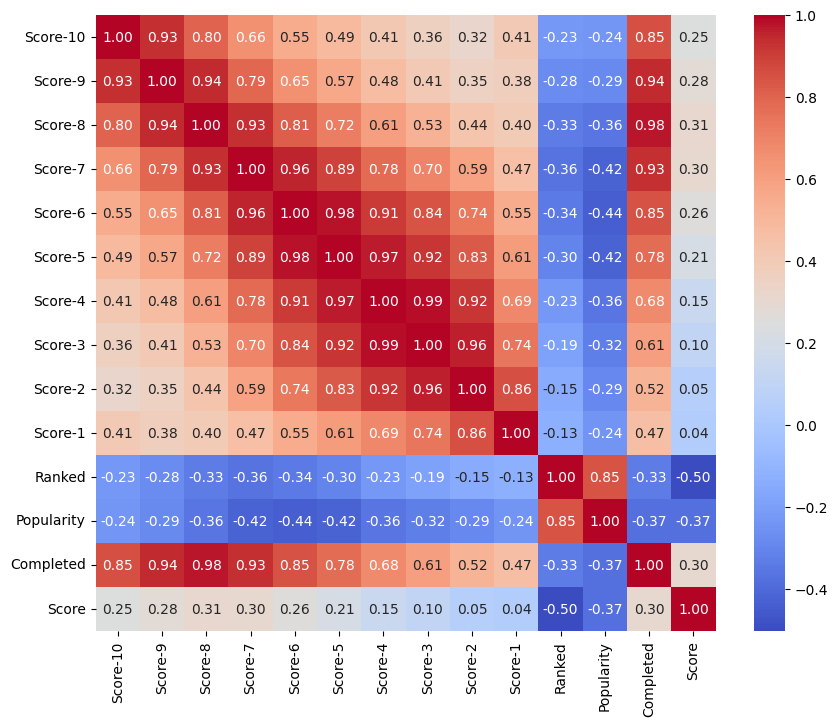

In [42]:
FeatureCorr = DatasetAnime_[AnimeDataCols_ + ['Score']].corr()
pyplt.figure(figsize=(10, 8))
sb.heatmap(FeatureCorr, annot=True, fmt=".2f", cmap='coolwarm')
pyplt.show()

**Data Visualisations**

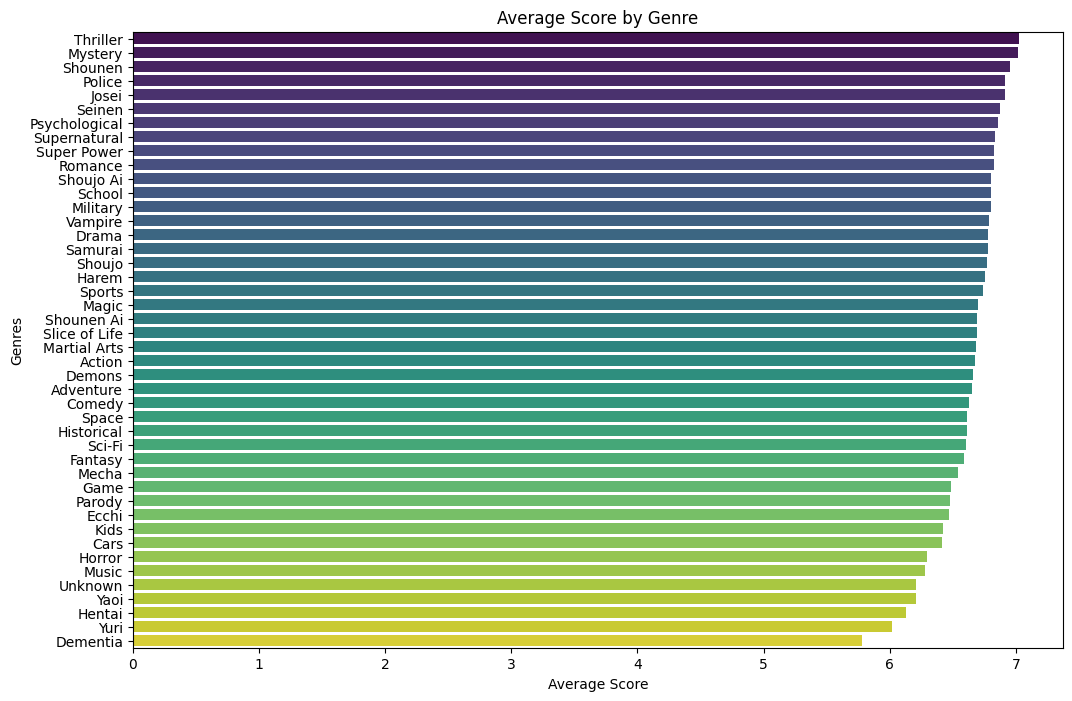

In [43]:
# Genres vs. Score
DF_Genre = DatasetAnime_.assign(Genres=DatasetAnime_['Genres'].str.split(', ')).explode('Genres')
calScores_genre = DF_Genre.groupby('Genres')['Score'].mean().sort_values(ascending=False)
pyplt.figure(figsize=(12, 8))
sb.barplot(x=calScores_genre.values, y=calScores_genre.index, palette='viridis')
pyplt.xlabel('Average Score')
pyplt.ylabel('Genres')
pyplt.title('Average Score by Genre')
pyplt.show()

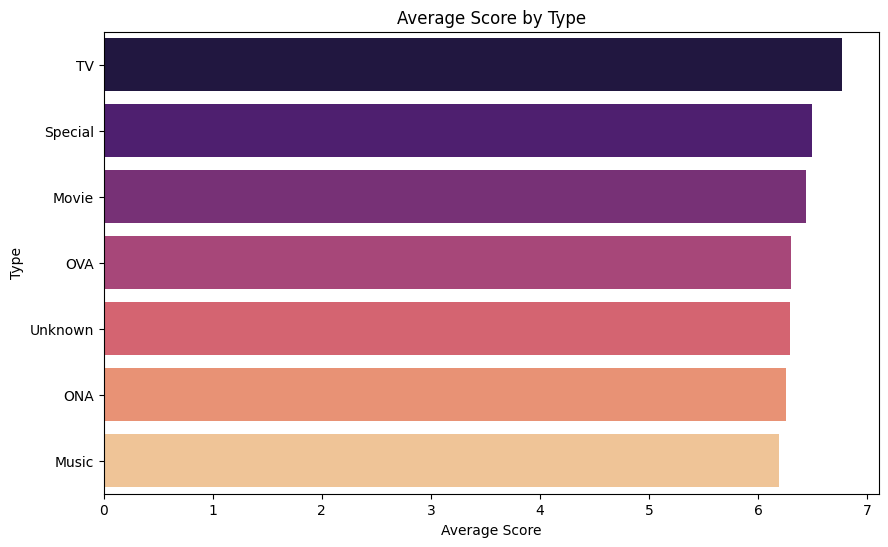

In [44]:
# Type vs. Score
calTypeScore = DatasetAnime_.groupby('Type')['Score'].mean().sort_values(ascending=False)
pyplt.figure(figsize=(10, 6))
sb.barplot(x=calTypeScore.values, y=calTypeScore.index, palette='magma')
pyplt.xlabel('Average Score')
pyplt.ylabel('Type')
pyplt.title('Average Score by Type')
pyplt.show()

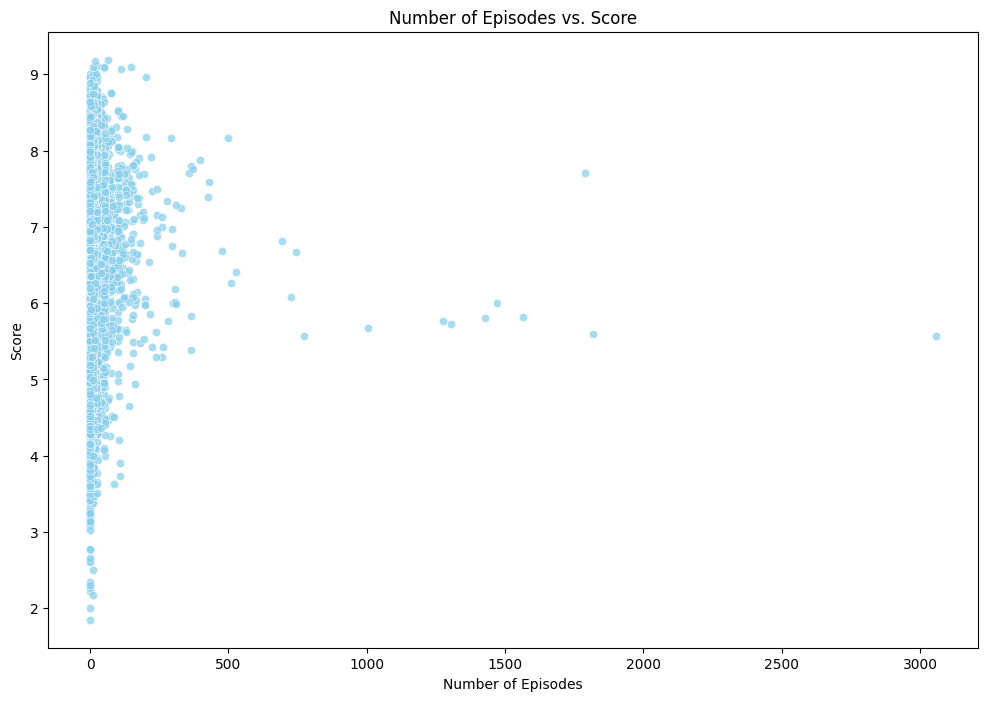

In [45]:
# Episodes vs. Score
EpisodesDF = DatasetAnime_[DatasetAnime_['Episodes'] != 'Unknown']
EpisodesDF['Episodes'] = EpisodesDF['Episodes'].astype(int)
pyplt.figure(figsize=(12, 8))
sb.scatterplot(x='Episodes', y='Score', data=EpisodesDF, alpha=0.7, color='skyblue')
pyplt.xlabel('Number of Episodes')
pyplt.ylabel('Score')
pyplt.title('Number of Episodes vs. Score')
pyplt.show()

In [46]:
# Premiered vs. Score
premieredAndScores = DatasetAnime_.groupby('Premiered')['Score'].mean().sort_values(ascending=False)
premieredAndScores

Premiered
Summer 1991    7.790000
Winter 1985    7.680000
Winter 1993    7.370000
Summer 1985    7.322460
Spring 1970    7.285282
                 ...   
Summer 1966    5.469507
Spring 1965    5.436279
Spring 1964    5.417219
Summer 1967    5.282609
Winter 1965    5.142157
Name: Score, Length: 231, dtype: float64

**Prepare data for modeling**

In [47]:
featuresX = DatasetAnime_[AnimeDataCols_]  # features
targety = DatasetAnime_['Score']        # target

**Split data**

In [48]:
TrainAnime_X, TestAnime_X, TrainAnimeY, TestAnime_y = train_test_split(featuresX, targety, test_size=0.2, random_state=42)

**Model Train and Testing**

**1.OLS**

**2.LinearRegression**

**3.Ridge**

**4.Lasso**

**Feature Scaling**

In [49]:
s = StandardScaler()
ScaledTrainX = s.fit_transform(TrainAnime_X)
ScaledTestX = s.transform(TestAnime_X)

In [50]:
All_Models = {
    "OLS": sm.OLS(TrainAnimeY, sm.add_constant(ScaledTrainX)).fit(),
    "LinearRegression": LinearRegression().fit(ScaledTrainX, TrainAnimeY),
    "Ridge": Ridge().fit(ScaledTrainX, TrainAnimeY),
    "Lasso": Lasso().fit(ScaledTrainX, TrainAnimeY)
}

**Model Evaluations**

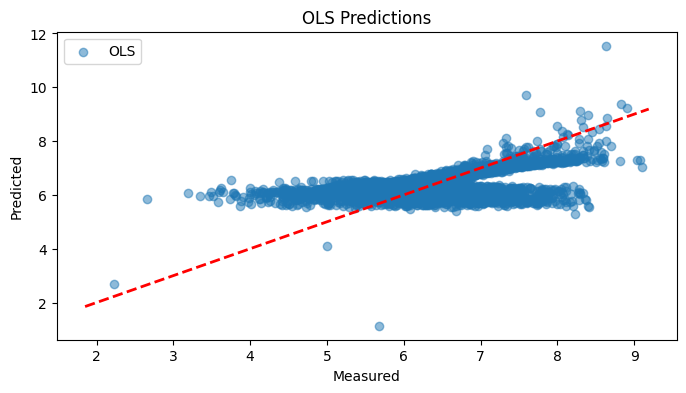

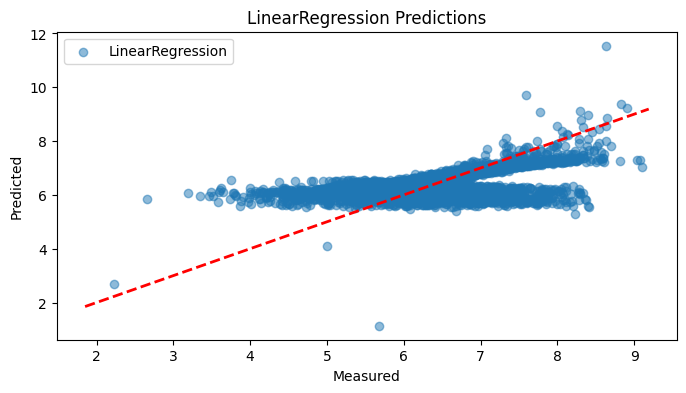

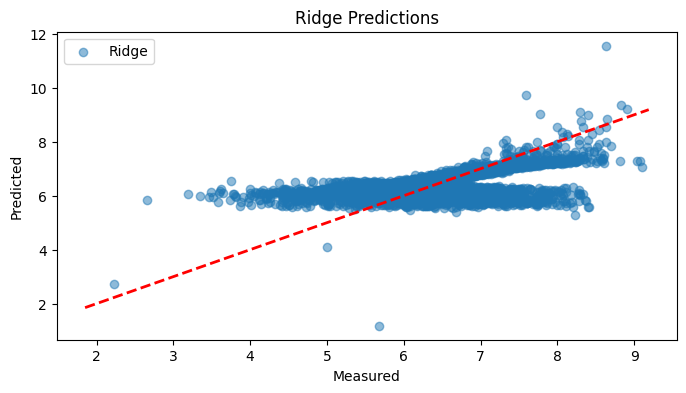

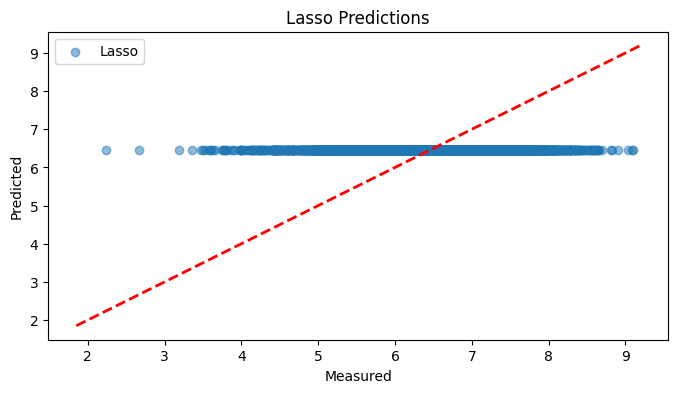

In [51]:
All_models_results = {}
for n, model in All_Models.items():
    if n == "OLS":
        pred = model.predict(sm.add_constant(ScaledTestX))
    else:
        pred = model.predict(ScaledTestX)

    cal_mse = mean_squared_error(TestAnime_y, pred)
    cal_mae = mean_absolute_error(TestAnime_y, pred)
    cal_rmse = np.sqrt(cal_mse)
    cal_r2 = r2_score(TestAnime_y, pred)
    All_models_results[n] = {"MSE": cal_mse, "MAE": cal_mae, "RMSE": cal_rmse, "R2": cal_r2}

    # Plot pred
    pyplt.figure(figsize=(8, 4))
    pyplt.scatter(TestAnime_y, pred, alpha=0.5, label=n)
    pyplt.plot([targety.min(), targety.max()], [targety.min(), targety.max()], 'r--', lw=2)
    pyplt.xlabel('Measured')
    pyplt.ylabel('Predicted')
    pyplt.title(f'{n} Predictions')
    pyplt.legend()
    pyplt.show()

**OLS summary and all results**

In [52]:
print(All_Models['OLS'].summary())
for n, result in All_models_results.items():
    print(f"{n} models_results:")
    print(f"  MSE: {result['MSE']:.3f}")
    print(f"  MAE: {result['MAE']:.3f}")
    print(f"  RMSE: {result['RMSE']:.3f}")
    print(f"  R2: {result['R2']:.3f}\n")

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     463.3
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:43:34   Log-Likelihood:                -16521.
No. Observations:               14049   AIC:                         3.307e+04
Df Residuals:                   14035   BIC:                         3.317e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4674      0.007    976.963      0.0

**Multiple linear regression**


In [53]:
numericalDF_Cols = ['Episodes', 'Score']
for c in numericalDF_Cols:
    DatasetAnime_[c] = pnd.to_numeric(DatasetAnime_[c], errors='coerce')
    median_value = DatasetAnime_[c].median()
    DatasetAnime_[c].fillna(median_value, inplace=True)

In [54]:
Cat_Cols = ['Name', 'Genres', 'English name', 'Japanese name', 'Type', 'Aired', 'Premiered']
for col in Cat_Cols:
    DatasetAnime_ = DatasetAnime_[DatasetAnime_[col] != 'Unknown']

In [55]:
df_Cat = pnd.get_dummies(DatasetAnime_[Cat_Cols], drop_first=True)
DF_features = pnd.concat([DatasetAnime_[['MAL_ID', 'Score', 'Episodes']], df_Cat], axis=1)
X_cat = DF_features.drop('Score', axis=1)
y_cat = DF_features['Score']

In [56]:
TrainAnime_X_cat, TestAnime_X_cat, TrainAnimeY_cat, TestAnime_y_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)
# Standardizing the features
scaler_cat = StandardScaler()
ScaledTrainX_cat = scaler_cat.fit_transform(TrainAnime_X_cat)
ScaledTestX_cat = scaler_cat.transform(TestAnime_X_cat)

In [57]:
# Fitting the linear regression model
model_cat = LinearRegression()
model_cat.fit(ScaledTrainX_cat, TrainAnimeY_cat)

LinearRegression()

In [58]:
coefficients_cat = model_cat.coef_
intercept_cat = model_cat.intercept_
feature_names_cat = X_cat.columns

In [59]:
print("coefficients_cat:", coefficients_cat)
print("Intercept:", intercept_cat)

coefficients_cat: [-0.00797584 -0.00395842 -0.00181563 ...  0.00120756  0.00064318
 -0.00231297]
Intercept: 6.974985134956074


In [60]:
Multi_regr = LinearRegression()
Multi_regr.fit(ScaledTrainX, TrainAnimeY)

LinearRegression()

In [61]:
print("Coefficients:")
for c, cff in zip(TrainAnime_X.columns, Multi_regr.coef_):
    print(c, cff)
print("Intercept:", Multi_regr.intercept_)

Coefficients:
Score-10 0.09368477592346393
Score-9 7.799010455546151e-05
Score-8 0.23976592043614037
Score-7 -0.44248831842492814
Score-6 0.9972427557609829
Score-5 -0.5108916696446099
Score-4 -0.2568534906896704
Score-3 0.349475594052469
Score-2 -0.1793676761401381
Score-1 -0.03995975723629233
Ranked -0.5696156825672778
Popularity 0.19421770313806078
Completed -0.10899966052125425
Intercept: 6.467421904083627


**Importance of Features for All Predictors**

In [62]:
def plotAllImp_Features(mod, featNames):
    imp = mod.coef_
    pyplt.figure(figsize=(10, 6))
    pyplt.barh(featNames, imp, color='skyblue')
    pyplt.xlabel('Coefficient Magnitude')
    pyplt.ylabel('Features')
    pyplt.title('Importance of Features for All Predictors')
    pyplt.gca().invert_yaxis()
    pyplt.show()


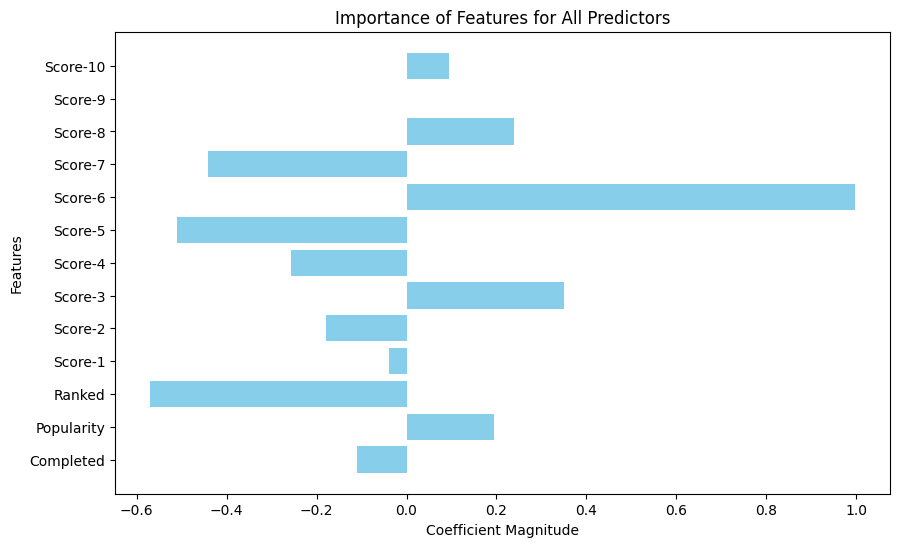

In [63]:
#Linear Regression Model
plotAllImp_Features(All_Models['LinearRegression'], AnimeDataCols_)

**show the most important features on top**

In [64]:
def plotFeaturesImp(model, featNames, title):
    coeff_cl = pnd.DataFrame({'Feature': featNames, 'Coefficient': model.coef_})
    coeff_cl.sort_values(by='Coefficient', ascending=False, inplace=True)

    pyplt.figure(figsize=(10, 6))
    pyplt.barh(coeff_cl['Feature'], coeff_cl['Coefficient'], color='green')
    pyplt.xlabel('Coefficient Value')
    pyplt.ylabel('Features')
    pyplt.title(title)
    pyplt.grid(axis='x')
    pyplt.gca().invert_yaxis()
    pyplt.show()

**Linear Regression Model with Excluded 'Type' and 'Source'**

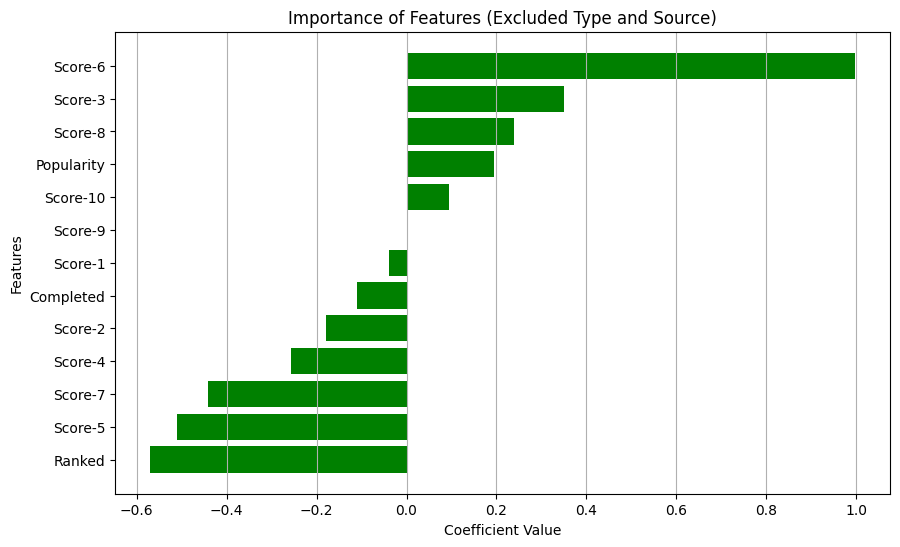

In [65]:
ex_features = ['Type', 'Source']
plotFeaturesImp(All_Models['LinearRegression'], AnimeDataCols_, 'Importance of Features (Excluded Type and Source)')

**Ridge Regression Model**


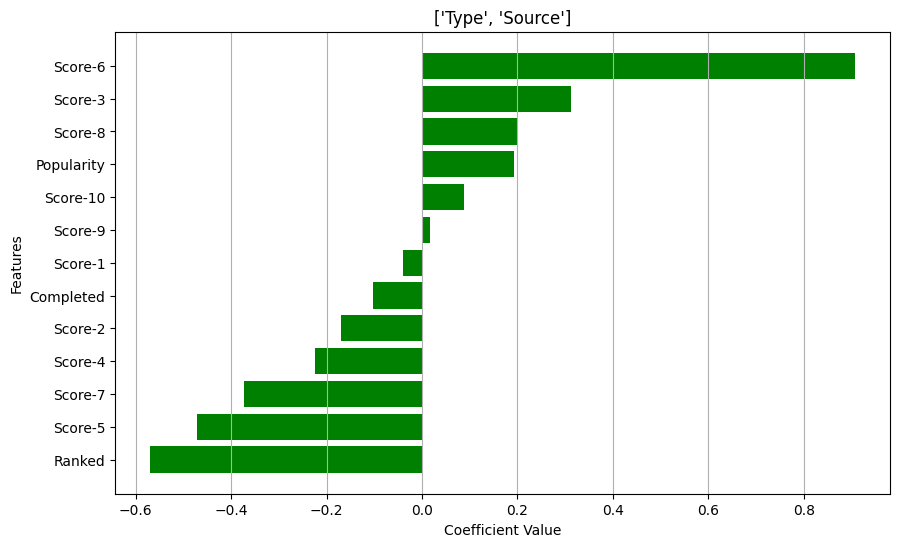

In [66]:
ex_features = ['Type', 'Source']
plotFeaturesImp(All_Models['Ridge'], AnimeDataCols_, ex_features)

**All Models Results and Comparisons**

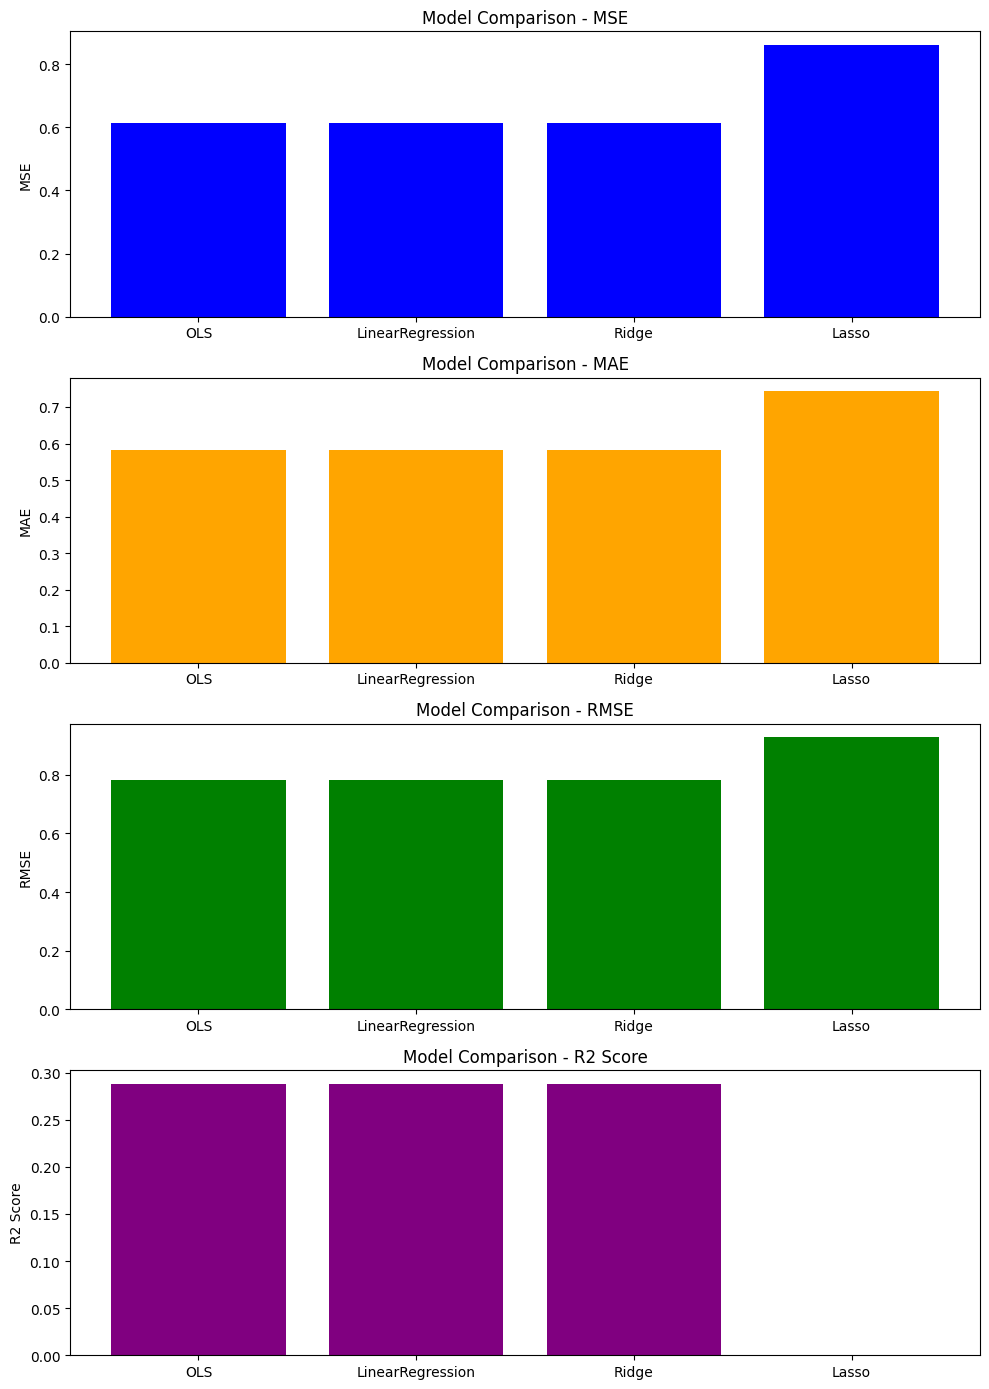

In [67]:
fig, ax = pyplt.subplots(4, 1, figsize=(10, 14))

mse_val_res = [All_models_results[name]['MSE'] for name in All_models_results]
mae_val_res = [All_models_results[name]['MAE'] for name in All_models_results]
rmse_val_res = [All_models_results[name]['RMSE'] for name in All_models_results]
r2_val_res = [All_models_results[name]['R2'] for name in All_models_results]
# Plot MSE comparison
ax[0].bar(All_models_results.keys(), mse_val_res, color='blue')
ax[0].set_title('Model Comparison - MSE')
ax[0].set_ylabel('MSE')

# Plot MAE comparison
ax[1].bar(All_models_results.keys(), mae_val_res, color='orange')
ax[1].set_title('Model Comparison - MAE')
ax[1].set_ylabel('MAE')
# Plot RMSE comparison
ax[2].bar(All_models_results.keys(), rmse_val_res, color='green')
ax[2].set_title('Model Comparison - RMSE')
ax[2].set_ylabel('RMSE')
# Plot R2 comparison
ax[3].bar(All_models_results.keys(), r2_val_res, color='purple')
ax[3].set_title('Model Comparison - R2 Score')
ax[3].set_ylabel('R2 Score')
pyplt.tight_layout()
pyplt.show()

**Test Cases**

**Test Case 1:**

Episodes: 100

Popularity: 500

Ranked: 600

Premiered: 750

All other features are set to 0.


**Test Case 2:**

Episodes: 12

Popularity: 200

Ranked: 200

Premiered: 400

All other features are set to 0.

In [68]:
# Test Case 1: Predicting scores for a new anime
test1 = [[100, 500, 600, 750] + [0] * (len(X_cat.columns) - 4)]
test1_df = pnd.DataFrame(test1, columns=X_cat.columns)
scaled_test1 = scaler_cat.transform(test1_df)
# Predict the score for the new anime
predicted_scores_1 = model_cat.predict(scaled_test1)
print("Predicted score for new anime 1:", predicted_scores_1*-1)
# Test Case 2: Predicting scores for another new anime
test2 = [[12, 200, 200, 400] + [0] * (len(X_cat.columns) - 4)]
test2_df = pnd.DataFrame(test2, columns=X_cat.columns)
scaled_test2 = scaler_cat.transform(test2_df)
# Predict the score for the new anime
predicted_scores_2 = model_cat.predict(scaled_test2)
print("Predicted score for new anime 2:", predicted_scores_2*-1)


Predicted score for new anime 1: [173.91049181]
Predicted score for new anime 2: [79.18767446]
